In [ ]:
#nombre: Sebastian Rodriguez Lopez
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

En este proyecto cargamos la base de datos "fashion mnist", que consta de 60 mil imagenes de entrenamiento y 10 mil imagenes de prueba. El objetivo es clasificar dichas imagenes por medio de un modelo de redes neuronales convolucionales.


La base de datos puede encontrarse en el siguiente enlace: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
#Cargamos la base de datos
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
#60,000 imagenes train y 10,000 imagenes test

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Imprimimos las dimensiones de nuestros datos de prueba y entrenamiento
print('Forma Datos de entrenamiento:', X_train.shape)
print('Forma etiquetas de entrenamiento:', y_train.shape)
print('Forma Datos de prueba:', X_test.shape)
print('Forma etiquetas de prueba:', y_test.shape)


Forma Datos de entrenamiento: (60000, 28, 28)
Forma etiquetas de entrenamiento: (60000,)
Forma Datos de prueba: (10000, 28, 28)
Forma etiquetas de prueba: (10000,)


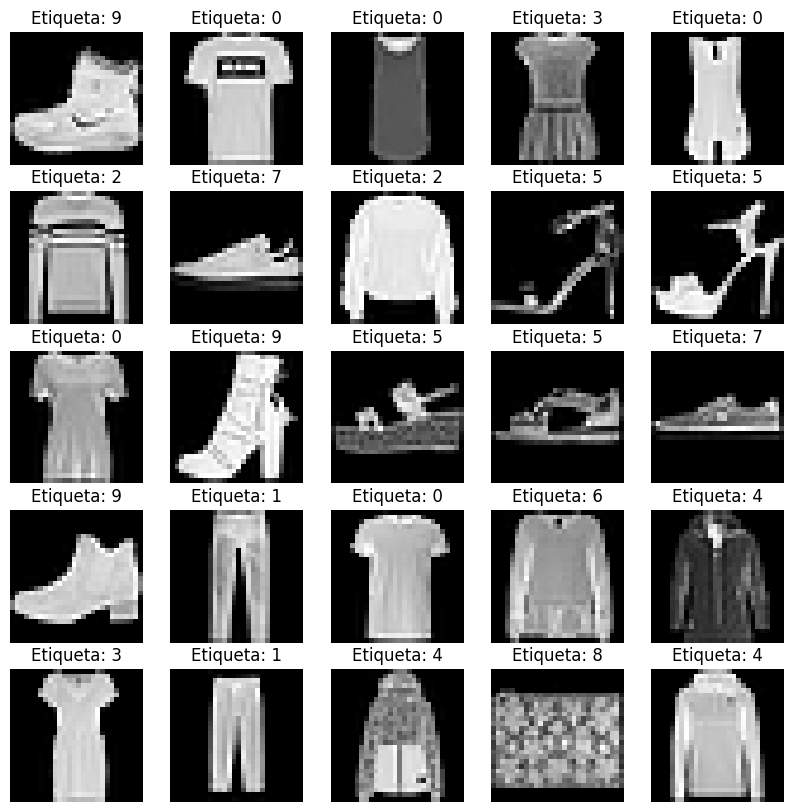

In [ ]:
#visualizamos una muestra
#en donde se tiene la siguiente clasificación:
#0=playera o top, 1=pantalon, 2=sueter, 3= vestido, 4= abrigo, 5= sandalias, 6= camisa, 7= sneakers, 8= bolsos, 9= zapato tipo botin
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#normalización: escalar los valores de los pixeles al rango [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#redimensionar las imagenes para incluir el canal, darle el alto y el ancho a las CNN (que esperan la info de la imagen)
X_train= np.expand_dims(X_train, -1) #forma: (60k imagenes, 28, 28, 1)
X_test= np.expand_dims(X_test, -1)  #forma(1k imagenes, 28, 28 ,1)


In [ ]:
#convertir etiquetas a one-hot
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [ ]:
print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de y_train:", y_train.shape)

Nueva forma de X_train: (60000, 28, 28, 1, 1)
Nueva forma de y_train: (60000, 10)


In [ ]:
##Arquitectura de la convolucional##

model= keras.Sequential([
    #convolucional 1
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    #capa pooling
    layers.MaxPooling2D(pool_size=(2,2)),
    #segunda convolucional, 64 filtros de 3x3, relu
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    #capa pooling 2
    layers.MaxPooling2D(pool_size=(2,2)),
    #aplanar los mapas de las caracteristicas para la capa densa
    layers.Flatten(),
    ##capa densa
    layers.Dense(128, activation='relu'),

    layers.Dropout(0.2), #el dropout regula y evita el overfitting y apaga el 20% de las neuronas

    ##Capa de salida con 10 neuronas, una para cada digito
    layers.Dense(10, activation='softmax')

])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##Compilacion del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar modelo
batch_size= 128   #cada paso de entrenamiento usará 128 imagenes
epochs=10

history=model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6976 - loss: 0.8461 - val_accuracy: 0.8578 - val_loss: 0.3932
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8575 - loss: 0.3974 - val_accuracy: 0.8783 - val_loss: 0.3319
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8777 - loss: 0.3350 - val_accuracy: 0.8880 - val_loss: 0.3067
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8885 - loss: 0.3013 - val_accuracy: 0.8990 - val_loss: 0.2797
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9030 - loss: 0.2661 - val_accuracy: 0.8943 - val_loss: 0.2809
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9038 - loss: 0.2581 - val_accuracy: 0.9043 - val_loss: 0.2629
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9108 - loss: 0.2436 - val_accuracy: 0.9073 - val_loss: 0.2520
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9203 - loss: 0.2155 - val_accuracy: 0

In [ ]:
#evaluamos el conjunto de prueba
test_loss, test_acc= model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")


Precisión en el conjunto de prueba: 0.9041


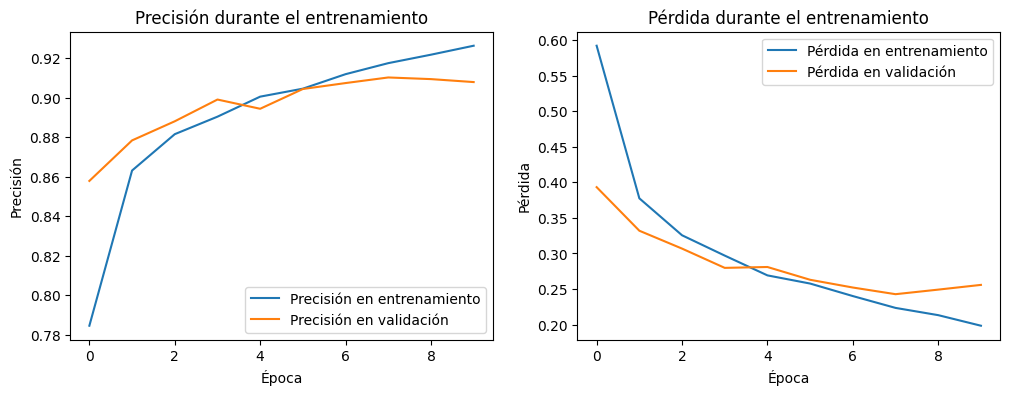

In [ ]:
plt.figure(figsize=(12, 4)) ###grafica de precision durante entr
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2) ##graf perdida durante entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


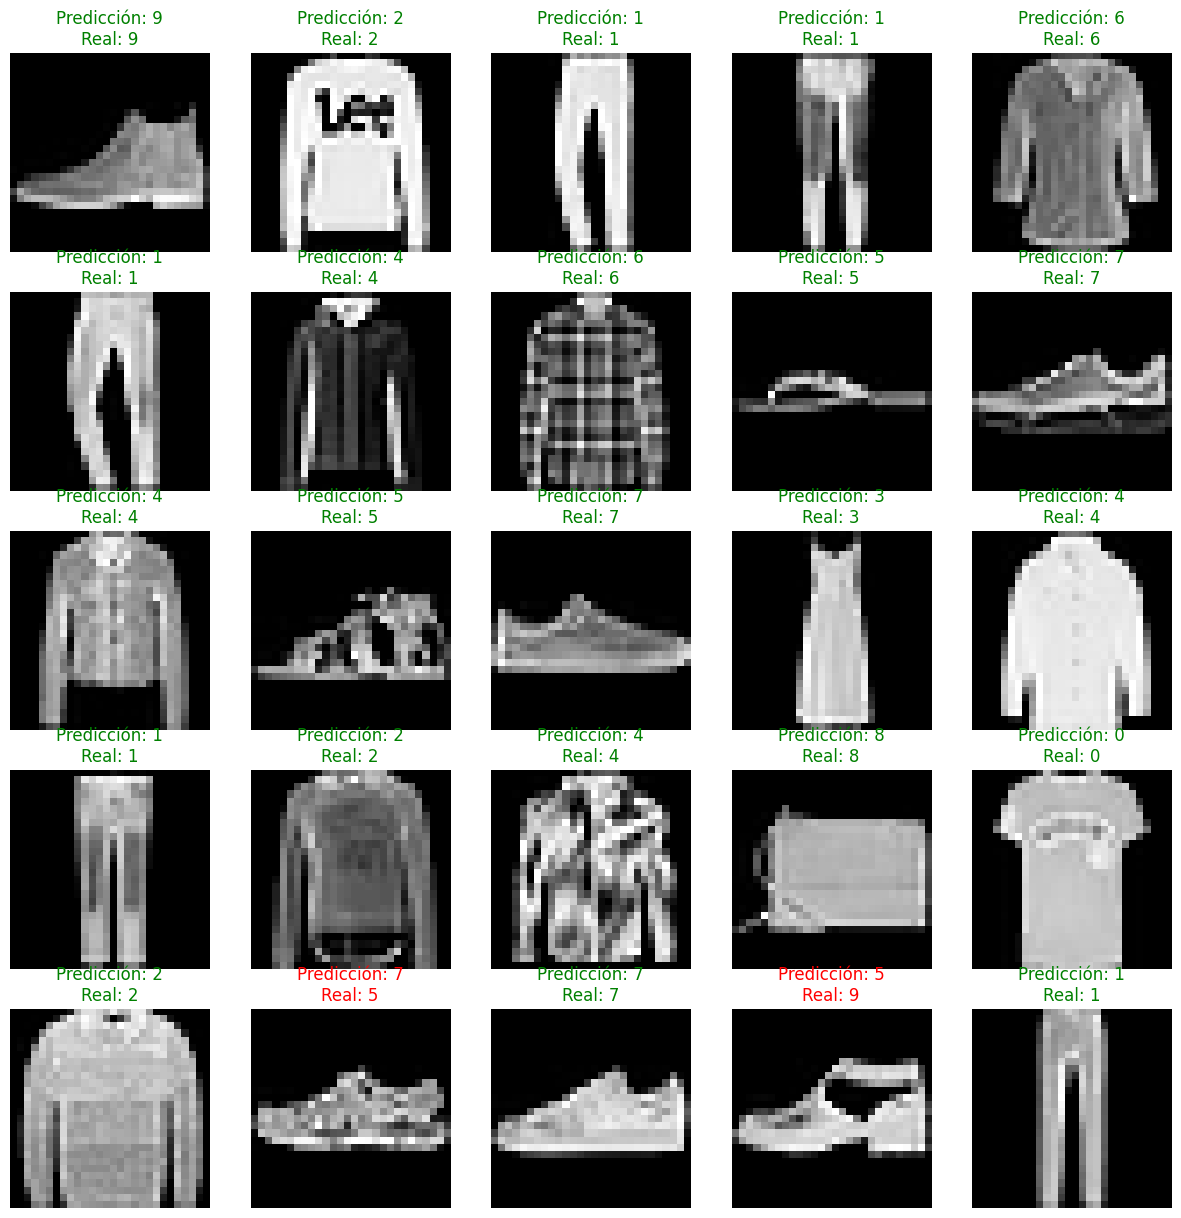

In [ ]:
##¿funciona el codigo?

predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions, axis=1)
true_labels= np.argmax(y_test, axis=1)

plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  color='green' if predicted_labels[i]==true_labels[i] else 'red'
  plt.title(f"Predicción: {predicted_labels[i]}\nReal: {true_labels[i]}", color=color)
  plt.axis('off')
plt.show()

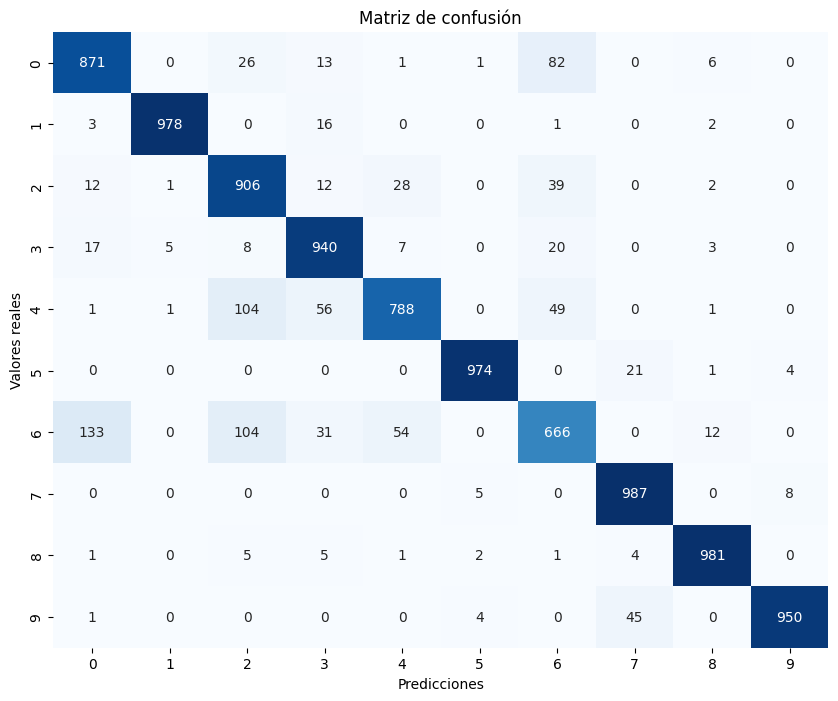

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()